# 2022년 1학기 금융시장의 빅데이터 분석 중간고사(담당교수: 박석진)

첨부된 midterm_data.csv를 이용해 문제를 푸세요.

### 상황 설명

- 경기 순환(Business Cycle)이란, 거시적인 경제 활동 수준이 주기적으로 상승과 하강을 일컫는 말입니다.
- 여러분들은 펀드매니저로써, 이러한 경제 활동의 주기적인 변동을 포트폴리오 구성에 반영할 것인지 결정해야합니다.
- 경기 순환을 고려한 포트폴리오 구성이 유용한지 판단하기 위해, 여러분들은 간단한 실증분석을 진행합니다.
- 문제 풀이에 있어, 1년은 252일로 계산하며 무위험자산의 연간 수익률(annual risk free rate)은 1.5%로 계산합니다.

#### 데이터 설명
- midterm_data.csv는 2000.1부터 2020.12까지 여러 금융자산들의 일별 가격변화율(daily return)을 기록한 데이터며, 자산의 목록은 다음과 같습니다.
    - Spain 10Y: 스페인 국채 10년물
    - KOSPI: KOSPI 주가지수
    - SPY: S&P500 주가지수
    - crudeOilFutures: 원유 선물
    - naturalGasFutures: 천연가스 선물
    - goldFutures: 금 선물
    - copperFutures: 구리 선물

- business_cycle_label은 일자별로 경기가 확장기인지(1), 또는 후퇴기(0)인지를 기록한 데이터며 아래의 그림은 이를 시각화해서 보여줍니다.

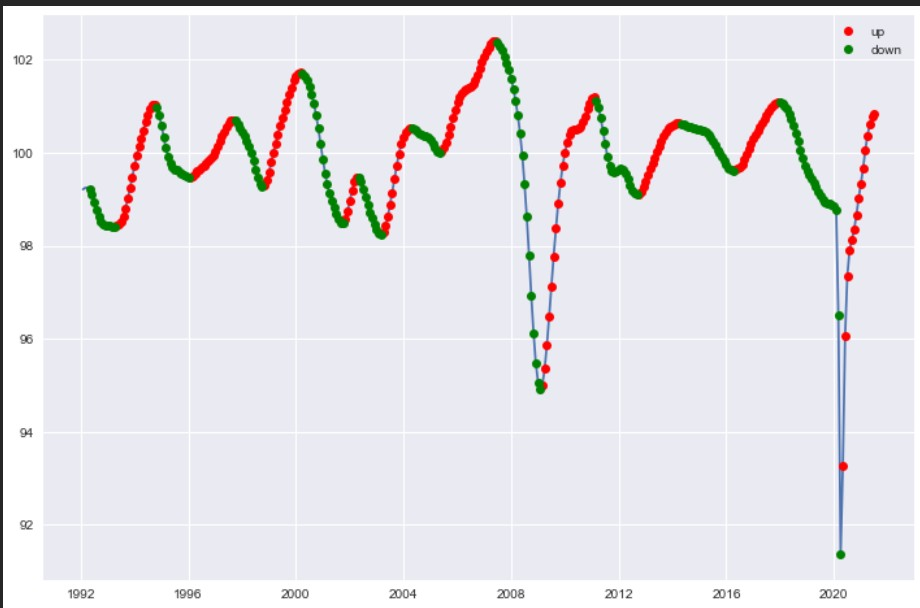

(1) business_cycle_label.csv를 이용해 midterm_data.csv로 다음의 세 가지 pandas dataframe들을 생성하시오 (5점)

- df_up: 경기 확장기에만 해당하는 데이터
- df_down: 경기 후퇴기에만 해당하는 데이터
- df: 전체 데이터

## Number One

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas_datareader.data as web
import datetime

df = pd.read_csv('midterm_data.csv')
tmp = pd.read_csv('business_cycle_label.csv')

df_up = df.copy()
df_up = pd.concat([df_up, tmp['cycle']], axis = 1)
df_up = df_up.loc[df_up.cycle == 1, :]
df_up = df_up.set_index(keys = ['Unnamed: 0'])
df_up.index.name = None
del df_up['cycle']

df_down = df.copy()
df_down = pd.concat([df_down, tmp['cycle']], axis = 1)
df_down = df_down.loc[df_down.cycle == 0, :]
df_down = df_down.set_index(keys = ['Unnamed: 0'])
df_down.index.name = None
del df_down['cycle']

df = df.set_index(keys = ['Unnamed: 0'])
df.index.name = None

FileNotFoundError: [Errno 2] No such file or directory: 'midterm_data.csv'

(2) (1)에서 생성한 각 dataframe에 대해, 무위험자산을 배제하고 자산의 가중치들을 무작위로 부여한 random portfolio를 5,000개 생성해 이를 ($\mu, \sigma$) 공간에 표시하시오. (10점)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Number 2

### (2)-1. DataFrame df

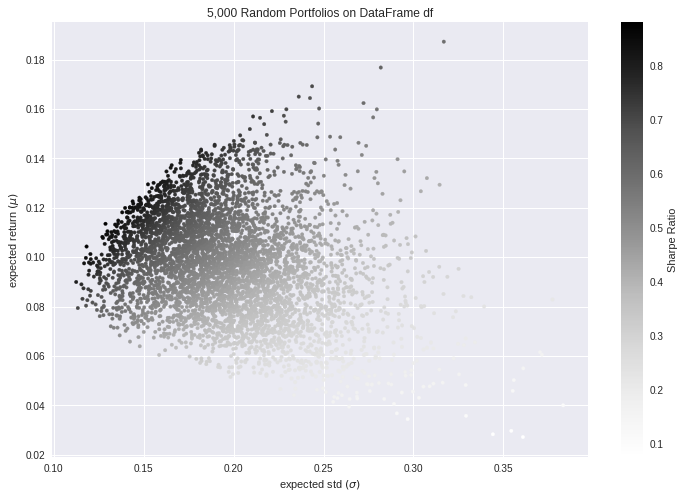

In [ ]:
def ret_std(weight, ret) :
    port_mean = np.sum(weight * ret.mean() * 252) # 가중치 * 일별 수익률의 평균
    port_var = np.dot(weight.T , np.dot(ret.cov() * 252 , weight))
    #분산을 구하기 위해서는 행렬 간의 곱을 해야하므로 np.dot() 메소드 사용
    port_std = np.sqrt(port_var)
    return port_mean, port_std


port_rets = []
port_std = []
noa = len(df.columns)

for i in range(5000) :
    weight = np.random.random(noa)
    weight /= sum(weight)
    mu, sig = ret_std(weight, df)
    port_rets.append(mu)
    port_std.append(sig)


plt.style.use('seaborn')
plt.figure(figsize = (12, 8))
plt.scatter(port_std, port_rets,
            c = np.array(port_rets) / np.array(port_std), marker = '.')
plt.grid(True)
plt.title('5,000 Random Portfolios on DataFrame df')
plt.ylabel('expected return $(μ)$')
plt.xlabel('expected std $(σ)$')
plt.colorbar(label = 'Sharpe Ratio')

### (2)-2. DataFrame df_up

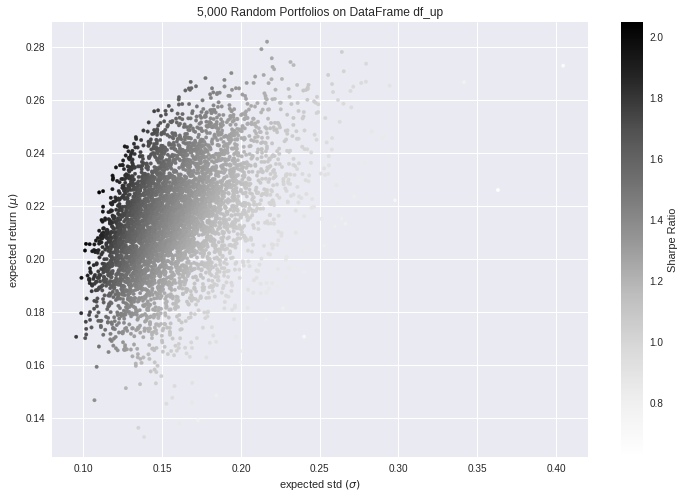

In [ ]:
port_rets_up = []
port_std_up = []
noa = len(df_up.columns)

for i in range(5000) :
    weight_up = np.random.random(noa)
    weight_up /= sum(weight_up)
    mu, sig = ret_std(weight_up, df_up)
    port_rets_up.append(mu)
    port_std_up.append(sig)


plt.style.use('seaborn')
plt.figure(figsize = (12, 8))
plt.scatter(port_std_up, port_rets_up,
            c = np.array(port_rets_up) / np.array(port_std_up), marker = '.')
plt.grid(True)
plt.title('5,000 Random Portfolios on DataFrame df_up')
plt.ylabel('expected return $(μ)$')
plt.xlabel('expected std $(σ)$')
plt.colorbar(label = 'Sharpe Ratio')

### (2)-3. DataFrame df_down

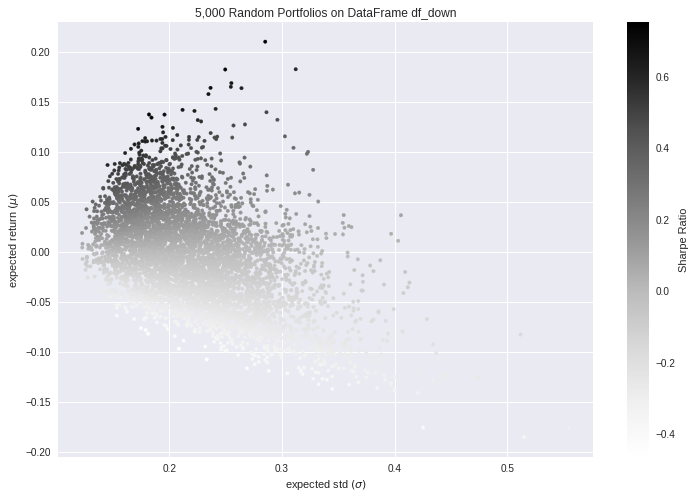

In [ ]:
port_rets_down = []
port_std_down = []

for i in range(5000) :
    weight_down = np.random.random(noa)
    weight_down /= sum(weight_down)
    mu, sig = ret_std(weight_down, df_down)
    port_rets_down.append(mu)
    port_std_down.append(sig)

plt.style.use('seaborn')
plt.figure(figsize = (12, 8))
plt.scatter(port_std_down, port_rets_down,
            c = np.array(port_rets_down) / np.array(port_std_down),marker = '.')
plt.grid(True)
plt.title('5,000 Random Portfolios on DataFrame df_down')
plt.ylabel('expected return $(μ)$')
plt.xlabel('expected std $(σ)$')
plt.colorbar(label = 'Sharpe Ratio')

## Number Three

(3) 모든 dataframe에 대해 무위험자산을 포함한 efficient frontier를 도출한 다음 이를 하나의 ($\mu, \sigma$) 공간에 표시하고, 서로의 annualized Sharpe Ratio를 비교하시오. (10점)

### (3)-1. DataFrame df

In [ ]:
import scipy.optimize as opt
def statistics(weight, rf = 0) :
    weight = np.array(weight)
    pret = np.dot(weight, df.mean()) * 252 - rf
    pvol = np.sqrt(np.dot(weight.T, np.dot(df.cov() * 252, weight)))
    return np.array([pret, pvol, pret/pvol])

def min_func_port(weight) :
    return statistics(weight)[1]

def min_func_volatility(weight):
    return statistics(weight)[1] **2

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
optv = opt.minimize(min_func_volatility, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [ ]:
cons = ({'type' : 'eq', 'fun' : lambda x : statistics(x)[0] - tret},
        {'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
bnds = [(0, 1) for x in range(noa)]

trets = np.linspace(statistics(optv['x'])[0], 0.15, 30) #앞선 예시에서 본 범위를 linspace로 설정
tvols = []

for tret in trets :
    cons = ({'type' : 'eq', 'fun' : lambda x : statistics(x)[0] - tret},
            {'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
    res = opt.minimize(min_func_port, noa * [1 / noa,], method = 'SLSQP',
                       bounds = bnds, constraints = cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

In [ ]:
def min_func_sharpe(weight, rf = 0.015) :
    return -statistics(weight)[2]

cons = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
bnds = [(0, 1) for x in range(noa)]
opts = opt.minimize(min_func_sharpe, noa * [1. / noa,], method = 'SLSQP',
                    bounds = bnds, constraints = cons)

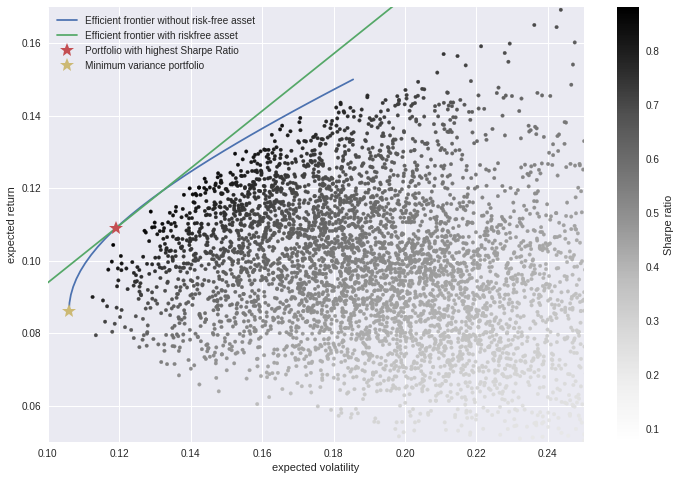

In [ ]:
rf = 0.015
slope = (statistics(opts['x'])[0] - rf) / statistics(opts['x'])[1]
var_list = [x * slope + rf for x in np.linspace(0, 0.35, 2500)]
x = np.linspace(0, 0.35, 2500)
y = var_list

plt.figure(figsize=(12, 8))

plt.plot(tvols, trets, label = 'Efficient frontier without risk-free asset')

plt.scatter(port_std, port_rets,
            c=np.array(port_rets) / np.array(port_std), marker='.')
plt.plot(x, y, label = 'Efficient frontier with riskfree asset')
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0, label = 'Minimum variance portfolio')
plt.xlim((0.1, 0.25))
plt.ylim((0.05, 0.17))
plt.legend()
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
print("DataFrame df의 Annualized Sharpe Ratio는 ", round(slope, 3))

DataFrame df의 Annualized Sharpe Ratio는  0.789


### (3)-2. DataFrame df_up

In [ ]:
def statistics_up(weight, rf = 0) :
    weight = np.array(weight)
    pret = np.dot(weight, df_up.mean()) * 252 - rf
    pvol = np.sqrt(np.dot(weight.T, np.dot(df_up.cov() * 252, weight)))
    return np.array([pret, pvol, pret/pvol])

def min_func_port(weight) :
    return statistics_up(weight)[1]

def min_func_volatility(weight):
    return statistics_up(weight)[1] **2

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
optv = opt.minimize(min_func_volatility, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [ ]:
cons = ({'type' : 'eq', 'fun' : lambda x : statistics_up(x)[0] - tret},
        {'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
bnds = [(0, 1) for x in range(noa)]

trets = np.linspace(statistics_up(optv['x'])[0], 0.27, 30) #앞선 예시에서 본 범위를 linspace로 설정
tvols = []

for tret in trets :
    cons = ({'type' : 'eq', 'fun' : lambda x : statistics_up(x)[0] - tret},
            {'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
    res = opt.minimize(min_func_port, noa * [1 / noa,], method = 'SLSQP',
                       bounds = bnds, constraints = cons)
    tvols.append(res['fun'])

tvols = np.array(tvols)

In [ ]:
def min_func_sharpe(weight, rf = 0.015) :
    return -statistics_up(weight)[2]

cons = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
bnds = [(0, 1) for x in range(noa)]
opts_up = opt.minimize(min_func_sharpe, noa * [1. / noa,], method = 'SLSQP',
                    bounds = bnds, constraints = cons)

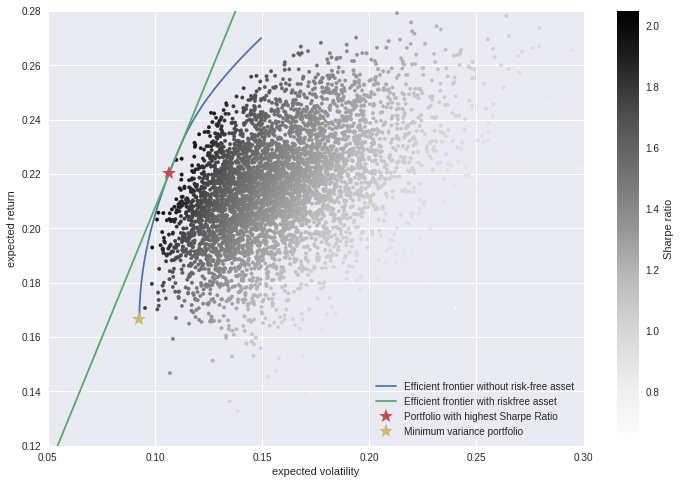

In [ ]:
rf = 0.015
slope = (statistics_up(opts_up['x'])[0] - rf) / statistics_up(opts_up['x'])[1]
var_list = [x * slope + rf for x in np.linspace(0, 0.35, 2500)]
x = np.linspace(0, 0.35, 2500)
y = var_list

plt.figure(figsize=(12, 8))

plt.plot(tvols, trets, label = 'Efficient frontier without risk-free asset')

plt.scatter(port_std_up, port_rets_up,
            c=np.array(port_rets_up) / np.array(port_std_up), marker='.')
plt.plot(x, y, label = 'Efficient frontier with riskfree asset')
plt.plot(statistics_up(opts_up['x'])[1], statistics_up(opts_up['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
plt.plot(statistics_up(optv['x'])[1], statistics_up(optv['x'])[0],
         'y*', markersize=15.0, label = 'Minimum variance portfolio')
plt.xlim((0.05, 0.30))
plt.ylim((0.12, 0.28))
plt.legend()
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
print("DataFrame df_up의 Annualized Sharpe Ratio는 ", round(slope, 3))

DataFrame df_up의 Annualized Sharpe Ratio는  1.925


### (3)-3. DataFrame df_down

In [ ]:
def statistics_down(weight, rf = 0) :
    weight = np.array(weight)
    pret = np.dot(weight, df_down.mean()) * 252 - rf
    pvol = np.sqrt(np.dot(weight.T, np.dot(df_down.cov() * 252, weight)))
    return np.array([pret, pvol, pret/pvol])

def min_func_port(weight) :
    return statistics_down(weight)[1]

def min_func_volatility(weight):
    return statistics_down(weight)[1] **2

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
optv = opt.minimize(min_func_volatility, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
print(optv['x'][1], statistics_down(optv['x'])[0])

In [ ]:
cons = ({'type' : 'eq', 'fun' : lambda x : statistics_down(x)[0] - tret},
        {'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
bnds = [(0, 1) for x in range(noa)]

trets = np.linspace(statistics_down(optv['x'])[0], 0.27, 30) #앞선 예시에서 본 범위를 linspace로 설정
tvols = []
for tret in trets :
    cons = ({'type' : 'eq', 'fun' : lambda x : statistics_down(x)[0] - tret},
            {'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
    res = opt.minimize(min_func_port, noa * [1 / noa,], method = 'SLSQP',
                       bounds = bnds, constraints = cons)
    tvols.append(res['fun'])

tvols = np.array(tvols)

In [ ]:
def min_func_sharpe(weight, rf = 0.015) :
    return -statistics_down(weight)[2]

cons = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - 1})
bnds = [(0, 1) for x in range(noa)]
opts_down = opt.minimize(min_func_sharpe, noa * [1. / noa,], method = 'SLSQP',
                    bounds = bnds, constraints = cons)

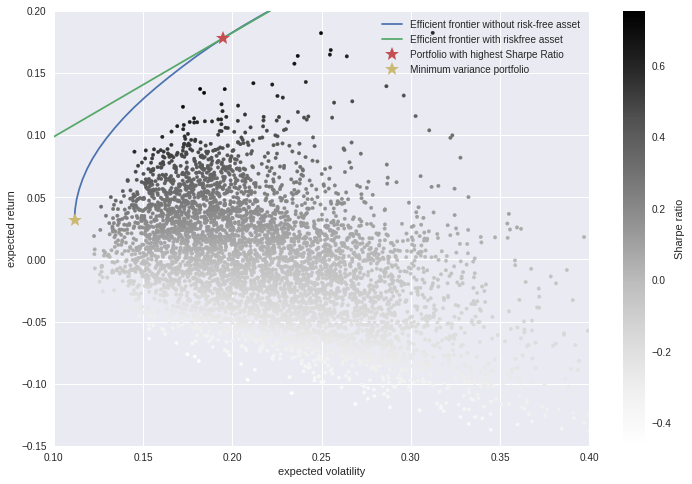

In [ ]:
rf = 0.015
slope = (statistics_down(opts_down['x'])[0] - rf) / statistics_down(opts_down['x'])[1]
var_list = [x * slope + rf for x in np.linspace(0.1, 0.4, 2500)]
x = np.linspace(0.1, 0.4, 2500)
y = var_list

plt.figure(figsize=(12, 8))

plt.plot(tvols, trets, label = 'Efficient frontier without risk-free asset')

plt.scatter(port_std_down, port_rets_down,
            c=np.array(port_rets_down) / np.array(port_std_down), marker='.')
plt.plot(x, y, label = 'Efficient frontier with riskfree asset')
plt.plot(statistics_down(opts_down['x'])[1], statistics_down(opts_down['x'])[0],
         'r*', markersize=15.0, label = 'Portfolio with highest Sharpe Ratio')
plt.plot(statistics_down(optv['x'])[1], statistics_down(optv['x'])[0],
         'y*', markersize=15.0, label = 'Minimum variance portfolio')
plt.xlim((0.1, 0.4))
plt.ylim((-0.15, 0.20))
plt.legend()
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
print("DataFrame df_down의 Annualized Sharpe Ratio는 ", round(slope, 3))

DataFrame df_down의 Annualized Sharpe Ratio는  0.837


- 경기 순환을 고려하지 않은 DataFrame df의 Annualized Sharpe Ratio는  0.789
- DataFrame df_up의 Annualized Sharpe Ratio는  1.925
- DataFrame df_down의 Annualized Sharpe Ratio는  0.837

세 DataFrame의 Annualized Sharpe의 크기를 비교하면 df_up, df_down, df 순으로 크다.

## Number Four

(4) (3)번의 결과를 고려할 때, 경기 순환을 고려한 포트폴리오 운용이 실효성이 있는가? 그 근거는 무엇인가?  (10점)

경기 순환을 고려한 포트폴리오 운용은 실효성이 있다.

경기 순환을 고려하여 포트폴리오를 운용하였을 때 산출된 Annualized Sharpe Ratio는 경기 순환을 고려하지 않았을 때의 Sharpe Ratio보다 더 높게 나온다. Sharpe Ratio의 정의를 짚어보면, 위험 한 단위에 대한 초과수익을 측정하는 척도이다. 경기순환을 고려하여 포트폴리오를 구성하면 동일한 위험을 부담하더라도 경기 순환을 고려하지 않았을 때보다 더 높은 수익을 낼 수 있다. 따라서 실효성이 있다고 판단할 수 있다.


## Number Five

(5) 경기 순환의 국면별 tangency portfolio를 고려할 때, 경기가 확장/후퇴 할때 어떤 자산을 보유하고 있는게 좋은가? (5점)

In [ ]:
res = pd.DataFrame({'Up' : opts_up['x'].round(3), 'Down' : opts_down['x'].round(3)})
res.index = list(df.columns)
print("경기 확장 국면과 후퇴 국면에서 각 자산별 비중")
print()
print(res)

경기 확장 국면과 후퇴 국면에서 각 자산별 비중

                      Up   Down
Spain 10Y          0.026  0.307
KOSPI              0.333  0.000
SPY                0.348  0.000
crudeOilFutures    0.057  0.000
naturalGasFutures  0.027  0.019
goldFutures        0.051  0.674
copperFutures      0.158  0.000


각 상황의 Tangency Portfolio 자산별 비중을 비교하였을때, 확장 국면에서는 주식(KOSPI, SPY)과 같은 유동성이 높은 자산을 보유하고 있는 것이 좋다. 반면 후퇴 국면에서는 장기 국채 (Spain 10Y)나 금(goldFutures)과 같이 안전자산을 보유하고 있는 것이 좋다.